In [1]:
import pandas as pd
import re
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("AWS_Honeypot_marx-geo.csv")

In [13]:
def remove_extra_word(feature, word_to_remove):
    """
    Removes unwanted words in a feature
    
    Arg: 
        feature: The feature of the dataset as a dataframe
        word_to_remove: The word to be removed as a string
    
    Returns:
        modified: The modified list of instances associated with the feature when the unwanted word is removed       
    """
    modified = []
    for i in range(len(feature)):
        modified.append(re.sub(word_to_remove,"",feature[i]))
    return modified

def unique_values(feature):
    """
    Removes unwanted words in a feature
    
    Arg: 
        feature: The feature of the dataset as a dataframe
    
    Returns:
        The unique instances of a feature      
    """
    return df[feature].unique().tolist()

def top_values_in_dict(top,feature):
    """
    Removes unwanted words in a feature
    
    Arg: 
        top: The number of top instances, eg: To observe top 3 instances in a dict, top = 3
        feature: The feature of the dataset as a dataframe
    
    Returns:
        The top number of instances    
    """
    top_country_count = dict(Counter(feature).most_common(top))
    return top_country_count

def ip_to_integer(ip):
    ip_string = ""
    ip_octets = ip.split(".")
    for i in ip_octets:
        ip_string = ip_string + bin(int(i))[2:]
    return int(ip_string,2)

def integer_to_ip(integer):
    pass

#Create a count of all countries with cyber attacks
country_count = dict(Counter(df["country"]))
#Create a count of top 5 countires with cyber attacks
top_country_count = top_values_in_dict(5,df["country"])
print(top_country_count)
top_attacked_ports = top_values_in_dict(5,df["dpt"])
print(top_attacked_ports)
top_attacked_sports = top_values_in_dict(5,df["spt"])
print(top_attacked_sports)
top_source_ip = top_values_in_dict(5,df["src"])
print(top_source_ip)

print(unique_values("proto"))
print(ip_to_integer("61.131.218.218"))

{'China': 191394, 'United States': 89982, 'Japan': 17204, 'Iran': 13042, 'Taiwan': 12148}
{1433.0: 109425, 445.0: 40611, 3389.0: 30077, 80.0: 19575, 56338.0: 18196}
{6000.0: 154133, 25416.0: 18195, 10100.0: 11116, 4445.0: 4716, 43825.0: 2884}
{2945632252: 18472, 45792730: 11116, 3417478163: 7086, 2148116578: 7046, 2169670188: 6772}
['TCP', 'UDP', 'ICMP']


TypeError: 'str' object cannot be interpreted as an integer

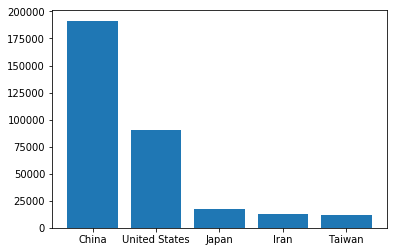

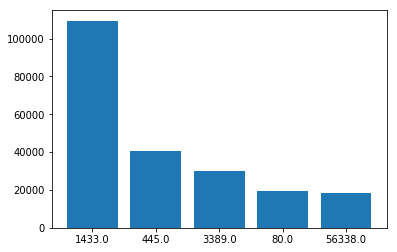

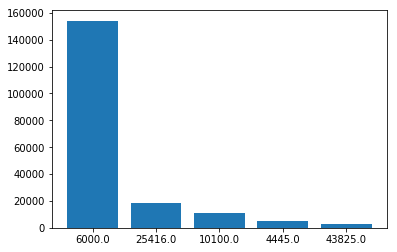

In [11]:
if __name__ == "__main__":
#     print(df["host"].unique().tolist())
#     print(set(remove_extra_word(df["host"],"groucho-")))
#     print(unique_values("country"))
    countries = list(top_country_count.keys())
    values = list(top_country_count.values())

    #tick_label does the some work as plt.xticks()
    plt.bar(range(len(top_country_count)),values,tick_label=countries)
    plt.show()
    
    ports = list(top_attacked_ports.keys())
    count = list(top_attacked_ports.values())
    plt.bar(range(len(top_attacked_ports)),count,tick_label=ports)
    plt.show()
    
    sports = list(top_attacked_sports.keys())
    scount = list(top_attacked_sports.values())
    plt.bar(range(len(top_attacked_sports)),scount,tick_label=sports)
    plt.show()
    
    source_ip = list(top_source_ip.keys())
    ip_count = list(top_source_ip.values())
    plt.bar(range(len(top_source_ip)),ip_count,tick_label=source_ip)
    plt.show()

In [42]:
df.head(20)

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN
5,3/3/13 21:58,groucho-tokyo,3323217250,TCP,NaN,32628.0,2323.0,198.20.69.98,US,United States,Illinois,IL,60661,41.8825,-87.6441,NaN
6,3/3/13 21:59,groucho-oregon,3730416887,TCP,NaN,6000.0,1433.0,222.89.164.247,CN,China,Henan Sheng,41,NaN,34.6836,113.5325,NaN
7,3/3/13 22:07,groucho-singapore,3738622573,TCP,NaN,6000.0,3306.0,222.214.218.109,CN,China,Sichuan Sheng,51,NaN,30.6667,104.0667,NaN
8,3/3/13 22:12,groucho-oregon,3683919430,TCP,NaN,6000.0,1433.0,219.148.38.70,CN,China,Hebei,13,NaN,39.8897,115.2750,NaN
9,3/3/13 22:14,groucho-singapore,1007884304,TCP,NaN,6000.0,1433.0,60.19.24.16,CN,China,Liaoning,21,NaN,41.7922,123.4328,NaN


In [59]:
def ip_to_integer(ip):
    ip_string = ""
    ip_octets = ip.split(".")
    res = 16777216 * ip_octes[0] + (65536 * o[1]) + 256 * int(ip_octets[2]) + int(ip_octets[3])
#     for i in ip_octets:
#         ip_string = ip_string + bin(int(i))[2:]
#         print(ip_string)
    return res #int(ip_string,2)

def integer_to_ip(ipnum):
    o1 = int(ipnum / 16777216) % 256
    o2 = int(ipnum / 65536) % 256
    o3 = int(ipnum / 256) % 256
    o4 = int(ipnum) % 256
    return '%(o1)s.%(o2)s.%(o3)s.%(o4)s' % locals()

# print(ip_to_integer("61.131.218.218"))
# print(integer_to_ip(1032051418))

# print(ip_to_integer("80.86.82.58"))
# print(integer_to_ip(1347834426))

print(ip_to_integer("50.45.128.28"))
print(integer_to_ip(841842716))

32796
50.45.128.28
